### The purpose of this notebook is to simulate 3 objects interacting gravitationally.

- F_g = G*M*m/r^2
- F_c = m*v^2/r
- F = m*a

### For each object, we need to sum the gravitational forces from all other objects

In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/ryanjsfx/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
dt = 0.6

NT = 10000
NUMBER_OF_OBJECTS = 3 # Earth, Moon, ISS
QUANTITIES = 10 # times, Object_distance, Object_distanceX, Object_distanceY, Object_velocities, Object_velX, Object_velY, \
                # Object_accelerations, Object_accelX, Object_accelY

In [5]:
data = np.zeros( (NUMBER_OF_OBJECTS, QUANTITIES, NT) )

In [6]:
ISS_altitude = 4.09e5 # meters
Earth_radius = 6.37e6 # meters
G = 6.67e-11 # m^3 * kg^-1 * s^-2 [N * m^2 / kg^2]
Earth_mass = 5.97e24 # kg
ISS_mass = 4.2e5 # 420,000 kg
Moon_mass = 7.3e22 # kg
Earth_moon_separation = 384e6 # meters

In [7]:
EARTH = 0
MOON  = 1
ISS   = 2

In [8]:
TIME = 0
POSX = 1
POSY = 2
POST = 3
VELX = 4
VELY = 5
VELT = 6
ACCX = 7
ACCY = 8
ACCT = 9

In [7]:
data[ISS, POST, 0] = ISS_altitude + Earth_radius
data[ISS, POSX, 0] = ISS_altitude + Earth_radius
data[ISS, VELT, 0] = np.sqrt(G*Earth_mass / data[ISS, POST, 0])
data[ISS, VELY, 0] = np.sqrt(G*Earth_mass / data[ISS, POST, 0])
data[ISS, ACCT, 0] = G*Earth_mass / data[ISS, POST, 0]**2
data[ISS, ACCX, 0] = -G*Earth_mass / data[ISS, POST, 0]**2

## TODO: set initial conditions for Moon

In [8]:
def update_accelerationsX(old_index):
    return -G*Earth_mass*ISS_distancesX[old_index]/ISS_distances[old_index]**3

In [9]:
# F_g = G*M*m/r^2 [direction]
# sin(theta) = F_g,y / F_g
# sin(theta) = y / r
# F_g,y = F_g*y/r

def update_accelerationsY(old_index):
    return -G*Earth_mass*ISS_distancesY[old_index]/ISS_distances[old_index]**3

In [10]:
def update_velocitiesX(old_index):
    return ISS_velocitiesX[old_index] + ISS_accelerationsX[old_index]*dt

In [11]:
def update_velocitiesY(old_index):
    return ISS_velocitiesY[old_index] + ISS_accelerationsY[old_index]*dt

In [12]:
def update_distancesX(old_index):
    return ISS_distancesX[old_index] + ISS_velocitiesX[old_index]*dt + 0.5*ISS_accelerationsX[old_index]*dt**2

In [13]:
def update_distancesY(old_index):
    return ISS_distancesY[old_index] + ISS_velocitiesY[old_index]*dt + 0.5*ISS_accelerationsY[old_index]*dt**2

In [14]:
for index in range(1,NT):
    times[index] = times[index-1] + dt
    
    ISS_velocitiesX[   index] = update_velocitiesX(   index-1)
    ISS_velocitiesY[   index] = update_velocitiesY(   index-1)
    
    ISS_distancesX[    index] = update_distancesX(    index-1)
    ISS_distancesY[    index] = update_distancesY(    index-1)
    
    ISS_accelerationsX[index] = update_accelerationsX(index-1)
    ISS_accelerationsY[index] = update_accelerationsY(index-1)
    
    ISS_distances[index]     = np.sqrt(ISS_distancesX[index-1]**2     + ISS_distancesY[index-1]**2)
    # print("new ISS_distances: ", ISS_distances[index])
    # print("new ISS_distancesX: ", ISS_distancesX[index])
    # print("new ISS_distancesY: ", ISS_distancesY[index])
    # print("old ISS_distances: ", ISS_distances[index-1])
    # print("old ISS_distancesX: ", ISS_distancesX[index-1])
    # print("old ISS_distancesY: ", ISS_distancesY[index-1])
    # input(">>")


In [15]:
ISS_distances     = np.sqrt(ISS_distancesX**2     + ISS_distancesY**2)
ISS_velocities    = np.sqrt(ISS_velocitiesX**2    + ISS_velocitiesY**2)
ISS_accelerations = np.sqrt(ISS_accelerationsX**2 + ISS_accelerationsY**2)

In [16]:
print("times: ", times)
print("ISS_distances: ", ISS_distances)

times:  [0.0000e+00 6.0000e-01 1.2000e+00 ... 5.9982e+03 5.9988e+03 5.9994e+03]
ISS_distances:  [6779000.         6779000.00000018 6779000.00000287 ... 6865457.65313493
 6865458.29676582 6865458.94298452]


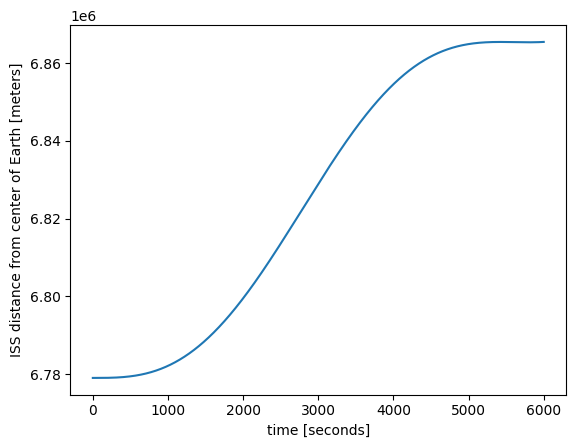

In [17]:
plt.plot(times, ISS_distances)
plt.xlabel("time [seconds]")
plt.ylabel("ISS distance from center of Earth [meters]")
plt.show()

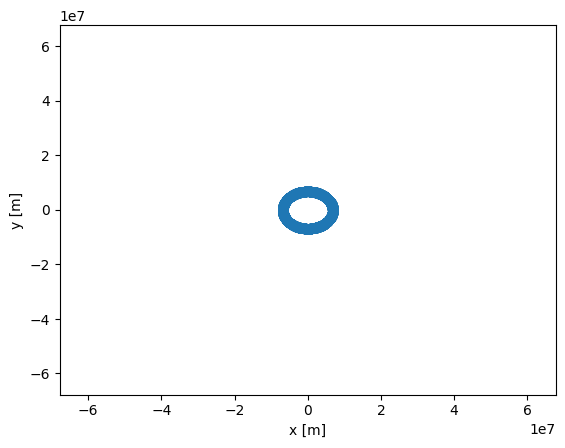

In [18]:
plt.plot(ISS_distancesX, ISS_distancesY, "o")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.ylim(-ISS_distances[0]*10, ISS_distances[0]*10)
plt.xlim(-ISS_distances[0]*10, ISS_distances[0]*10)
plt.show()

In [ ]:
for i in range(NT):
    plt.plot(ISS_distancesX[i], ISS_distancesY[i], "o")
    plt.xlabel("x [m]")
    plt.ylabel("y [m]")
    plt.ylim(-ISS_distances[0]*10, ISS_distances[0]*10)
    plt.xlim(-ISS_distances[0]*10, ISS_distances[0]*10)
    plt.savefig("ISS_position" + str(i).zfill(4) + ".png")
    plt.close()